In [1]:
import cirq
import numpy as np
from cirq.contrib.svg import SVGCircuit as draw
from cirq.circuits import InsertStrategy

In [49]:
#we need 4 qubits
#1 Alice
#2 bit->Alice
#3 Bob
#4 bit->Bob

q=[cirq.LineQubit(i) for i in range(4)]
c=cirq.Circuit()

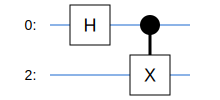

In [50]:
c.append(cirq.H(q[0]))
c.append(cirq.CNOT(q[0],q[2]))
draw(c)

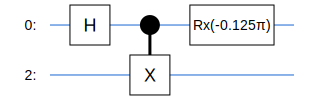

In [51]:
c.append(cirq.rx(-np.pi/8).on(q[0]))
draw(c)

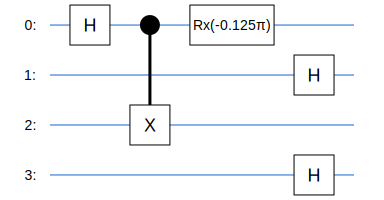

In [52]:
c.append(cirq.H(q[1]),strategy=InsertStrategy.NEW_THEN_INLINE)
c.append(cirq.H(q[3]),strategy=InsertStrategy.INLINE)
draw(c)

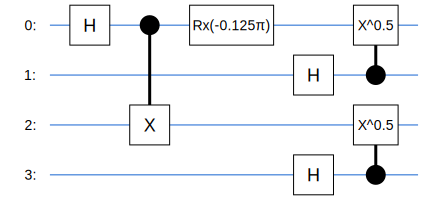

In [53]:
c.append(cirq.ControlledGate(cirq.rx(np.pi/4)).on(q[1],q[0]))
c.append(cirq.ControlledGate(cirq.rx(np.pi/4)).on(q[3],q[2]))
draw(c)


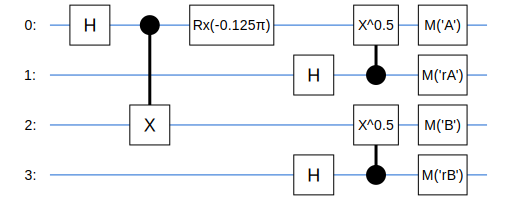

In [54]:
c.append(cirq.measure(q[0],key='A'))
c.append(cirq.measure(q[1],key='rA'))
c.append(cirq.measure(q[2],key='B'))
c.append(cirq.measure(q[3],key='rB'))
draw(c)

In [55]:
sim = cirq.Simulator()
result = sim.run(c, repetitions=100)

In [56]:
A = result.measurements['A'][:, 0]
r_A = result.measurements['rA'][:, 0]
B = result.measurements['B'][:, 0]
r_B = result.measurements['rB'][:, 0]

In [57]:
win= (np.array(A)+np.array(B))%2 ==(np.array(r_A) & np.array(r_B))

In [58]:
np.mean(win)

0.826607

In [59]:
(1/2)*(np.cos(np.pi/8))**2

0.42677669529663687

In [107]:
def cirqqs(thetha):
    q=[cirq.LineQubit(i) for i in range(4)]
    c=cirq.Circuit()
    c.append(cirq.H(q[0]))
    c.append(cirq.CNOT(q[0],q[2]))
    c.append(cirq.rx(-thetha).on(q[0]))
    c.append(cirq.H(q[1]),strategy=InsertStrategy.NEW_THEN_INLINE)
    c.append(cirq.H(q[3]),strategy=InsertStrategy.INLINE)
    c.append(cirq.ControlledGate(cirq.rx(np.pi/2)).on(q[1],q[0]))
    c.append(cirq.ControlledGate(cirq.rx(np.pi/2)).on(q[3],q[2]))
    c.append(cirq.measure(q[0],key='A'))
    c.append(cirq.measure(q[1],key='rA'))
    c.append(cirq.measure(q[2],key='B'))
    c.append(cirq.measure(q[3],key='rB'))
    draw(c)
    sim = cirq.Simulator()
    result = sim.run(c, repetitions=10000)
    A = result.measurements['A'][:, 0]
    r_A = result.measurements['rA'][:, 0]
    B = result.measurements['B'][:, 0]
    r_B = result.measurements['rB'][:, 0]
    win= (np.array(A)+np.array(B))%2 ==(np.array(r_A) & np.array(r_B))
    return np.mean(win)

In [108]:
L=[]
for theta in np.arange(0,2*np.pi,np.pi/8):
    L.append(cirqqs(theta))

In [109]:
import matplotlib.pyplot as plt

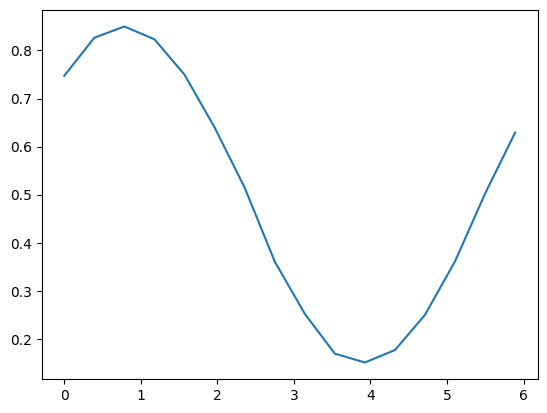

In [110]:
plt.plot(np.arange(0,2*np.pi,np.pi/8),L)

In [82]:
win= (np.array(A)+np.array(B))%2 ==(np.array(r_A) & np.array(r_B))
np.mean(win)

0.85415

0.8535533905932737